**Комментарий от студента Титова Д.А.**

В блокноте исследуется предсказание Swin-Transformer

От оригинального кода была добавлено отображение тестируемого изображения и недостающая библиотека requests

В сравнении с другими моделями нейронных сетей, тестовое случайное изображение карликового пуделя здесь определилось как плюшевый медведь

tabby, tabby cat


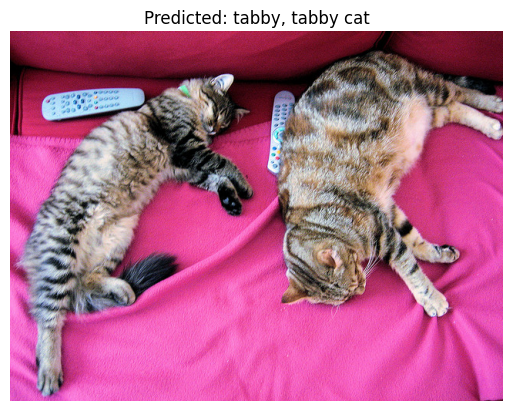

In [3]:
from transformers import AutoImageProcessor, MobileViTV2ForImageClassification
from datasets import load_dataset
from PIL import Image
import requests
import matplotlib.pyplot as plt


url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

image_processor = AutoImageProcessor.from_pretrained(
    "apple/mobilevitv2-1.0-imagenet1k-256"
)
model = MobileViTV2ForImageClassification.from_pretrained(
    "apple/mobilevitv2-1.0-imagenet1k-256"
)

inputs = image_processor(image, return_tensors="pt")

logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

# Отображение изображения
plt.imshow(image)
plt.title(f"Predicted: {model.config.id2label[predicted_label]}")
plt.axis('off')
plt.show()

In [4]:
from google.colab import files
upload = files.upload()

Saving photo_2025-05-31_18-59-35.jpg to photo_2025-05-31_18-59-35.jpg


Predicted class: teddy, teddy bear


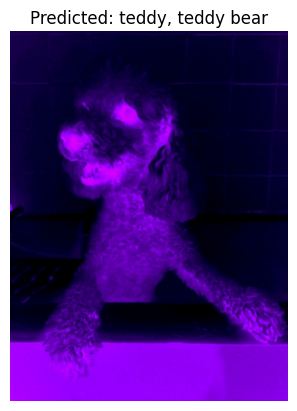

In [5]:
from io import BytesIO
# Get the filename of the uploaded image
filename = list(upload.keys())[0]

# Open the image
try:
    image = Image.open(BytesIO(upload[filename]))
except Exception as e:
    print(f"Error opening image: {e}")
    exit()

# Process the image
inputs = image_processor(image, return_tensors="pt")

# Perform inference
outputs = model(**inputs)
logits = outputs.logits

# Get the predicted class
predicted_class_idx = logits.argmax(-1).item()
predicted_class_label = model.config.id2label[predicted_class_idx]

print("Predicted class:", predicted_class_label)

# Display the image
plt.imshow(image)
plt.title(f"Predicted: {predicted_class_label}")
plt.axis('off')
plt.show()